In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt


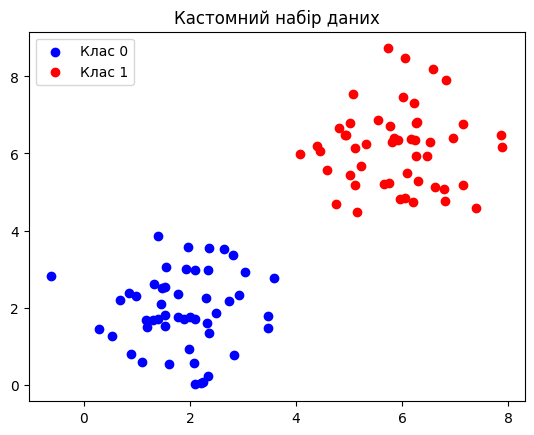

In [2]:
# Створюємо 2 класи точок з різними центрами
np.random.seed(42)
X_class1 = np.random.normal([2, 2], 1, (50, 2))
X_class2 = np.random.normal([6, 6], 1, (50, 2))

# Об'єднуємо
X = np.vstack((X_class1, X_class2))
y = np.array([0]*50 + [1]*50)

# Візуалізація даних
plt.scatter(X_class1[:,0], X_class1[:,1], color='blue', label='Клас 0')
plt.scatter(X_class2[:,0], X_class2[:,1], color='red', label='Клас 1')
plt.legend()
plt.title("Кастомний набір даних")
plt.show()


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree accuracy:", accuracy_score(y_test, y_pred_tree))


Decision Tree accuracy: 1.0


In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN accuracy:", accuracy_score(y_test, y_pred_knn))


KNN accuracy: 1.0


In [6]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("SVM (linear) accuracy:", accuracy_score(y_test, y_pred_linear))


SVM (linear) accuracy: 1.0


In [7]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("SVM (RBF) accuracy:", accuracy_score(y_test, y_pred_rbf))


SVM (RBF) accuracy: 1.0


In [8]:
results = pd.DataFrame({
    'Модель': ['Decision Tree', 'KNN', 'SVM Linear', 'SVM RBF'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_tree),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_linear),
        accuracy_score(y_test, y_pred_rbf)
    ]
})
print(results)


          Модель  Accuracy
0  Decision Tree       1.0
1            KNN       1.0
2     SVM Linear       1.0
3        SVM RBF       1.0


In [9]:
print("Classification report (SVM RBF):")
print(classification_report(y_test, y_pred_rbf))


Classification report (SVM RBF):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

